In [49]:
import pandas as pd
import numpy as np

In [3]:
heart = pd.read_csv('/home/tiago/Downloads/heart_2020_cleaned.csv')
heart.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [6]:
# Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
heart['HeartDisease']= label_encoder.fit_transform(heart['HeartDisease'])
heart['Smoking']= label_encoder.fit_transform(heart['Smoking'])
heart['AlcoholDrinking']= label_encoder.fit_transform(heart['AlcoholDrinking'])
heart['Stroke']= label_encoder.fit_transform(heart['Stroke'])
heart['DiffWalking']= label_encoder.fit_transform(heart['DiffWalking'])
heart['Sex']= label_encoder.fit_transform(heart['Sex'])
heart['AgeCategory']= label_encoder.fit_transform(heart['AgeCategory'])
heart['Race']= label_encoder.fit_transform(heart['Race'])
heart['Diabetic']= label_encoder.fit_transform(heart['Diabetic'])
heart['PhysicalActivity']= label_encoder.fit_transform(heart['PhysicalActivity'])
heart['GenHealth']= label_encoder.fit_transform(heart['GenHealth'])
heart['Asthma']= label_encoder.fit_transform(heart['Asthma'])
heart['KidneyDisease']= label_encoder.fit_transform(heart['KidneyDisease'])
heart['SkinCancer']= label_encoder.fit_transform(heart['SkinCancer'])

heart.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0


In [7]:
X, y = heart.loc[:, heart.columns != 'HeartDisease'], heart['HeartDisease']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
#XGBoost with Bagging and Boosting
import xgboost as xgb
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score


# Init classifier
xgb_cl = xgb.XGBClassifier()

# The baggging ensemble classifier is initialized with:

bagging = BaggingClassifier(base_estimator=xgb_cl, n_estimators=5, max_samples=50, bootstrap=True)

# Training
bagging.fit(X_train, y_train)

# Evaluating
print(f"Train score: {bagging.score(X_train, y_train)}")
print(f"Test score: {bagging.score(X_test, y_test)}")

# Fit
xgb_cl.fit(X_train, y_train)

# Predict
preds = xgb_cl.predict(X_test)

# Score
accuracy_score(y_test, preds)


/home/tiago/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:18:17] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:18:22] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:18:27] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:18:33] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

/home/tiago/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:18:45] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9141016687686968

In [12]:
#Decision Tree Classifier with Bagging and Boosting

from sklearn.tree import DecisionTreeClassifier 
# Import Decision Tree Classifier
from sklearn.ensemble import BaggingClassifier
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics 


tree = DecisionTreeClassifier(max_depth=3, random_state=23)

# The baggging ensemble classifier is initialized with:

bagging = BaggingClassifier(base_estimator=tree, n_estimators=5, max_samples=50, bootstrap=True)

# Training
bagging.fit(X_train, y_train)

# Evaluating
print(f"Train score: {bagging.score(X_train, y_train)}")
print(f"Test score: {bagging.score(X_test, y_test)}")


# Train Decision Tree Classifer
tree = tree.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = tree.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Train score: 0.9104156243299264
Test score: 0.9093069554612827
Accuracy: 0.9135909275685592


In [13]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8435672667007161


In [14]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.9137055837563451


In [52]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(8, input_dim=17, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=300, batch_size=1000, validation_split=0.1)
# evaluate the keras model
_, accuracy = model.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy))

Epoch 1/300
202/202 [==============================] - 1s 4ms/step - loss: 0.3469 - accuracy: 0.9085 - val_loss: 0.2556 - val_accuracy: 0.9132
Epoch 2/300
202/202 [==============================] - 1s 3ms/step - loss: 0.2439 - accuracy: 0.9150 - val_loss: 0.2433 - val_accuracy: 0.9133
Epoch 3/300
202/202 [==============================] - 1s 3ms/step - loss: 0.2367 - accuracy: 0.9152 - val_loss: 0.2391 - val_accuracy: 0.9133
Epoch 4/300
202/202 [==============================] - 1s 3ms/step - loss: 0.2336 - accuracy: 0.9153 - val_loss: 0.2367 - val_accuracy: 0.9133
Epoch 5/300
202/202 [==============================] - 1s 3ms/step - loss: 0.2314 - accuracy: 0.9157 - val_loss: 0.2353 - val_accuracy: 0.9133
Epoch 6/300
202/202 [==============================] - 1s 3ms/step - loss: 0.2300 - accuracy: 0.9158 - val_loss: 0.2339 - val_accuracy: 0.9139
Epoch 7/300
202/202 [==============================] - 1s 4ms/step - loss: 0.2290 - accuracy: 0.9159 - val_loss: 0.2333 - val_accuracy: 0.9143

Epoch 58/300
202/202 [==============================] - 1s 3ms/step - loss: 0.2241 - accuracy: 0.9164 - val_loss: 0.2296 - val_accuracy: 0.9153
Epoch 59/300
202/202 [==============================] - 1s 3ms/step - loss: 0.2241 - accuracy: 0.9165 - val_loss: 0.2293 - val_accuracy: 0.9144
Epoch 60/300
202/202 [==============================] - 1s 3ms/step - loss: 0.2241 - accuracy: 0.9164 - val_loss: 0.2296 - val_accuracy: 0.9148
Epoch 61/300
202/202 [==============================] - 1s 3ms/step - loss: 0.2241 - accuracy: 0.9165 - val_loss: 0.2296 - val_accuracy: 0.9143
Epoch 62/300
202/202 [==============================] - 1s 3ms/step - loss: 0.2240 - accuracy: 0.9165 - val_loss: 0.2294 - val_accuracy: 0.9145
Epoch 63/300
202/202 [==============================] - 1s 3ms/step - loss: 0.2240 - accuracy: 0.9166 - val_loss: 0.2295 - val_accuracy: 0.9148
Epoch 64/300
202/202 [==============================] - 1s 3ms/step - loss: 0.2240 - accuracy: 0.9165 - val_loss: 0.2292 - val_accuracy:

Epoch 115/300
202/202 [==============================] - 1s 3ms/step - loss: 0.2236 - accuracy: 0.9166 - val_loss: 0.2290 - val_accuracy: 0.9152
Epoch 116/300
202/202 [==============================] - 1s 3ms/step - loss: 0.2235 - accuracy: 0.9166 - val_loss: 0.2293 - val_accuracy: 0.9152
Epoch 117/300
202/202 [==============================] - 1s 3ms/step - loss: 0.2235 - accuracy: 0.9165 - val_loss: 0.2290 - val_accuracy: 0.9153
Epoch 118/300
202/202 [==============================] - 1s 3ms/step - loss: 0.2235 - accuracy: 0.9166 - val_loss: 0.2291 - val_accuracy: 0.9157
Epoch 119/300
202/202 [==============================] - 1s 3ms/step - loss: 0.2235 - accuracy: 0.9166 - val_loss: 0.2290 - val_accuracy: 0.9150
Epoch 120/300
202/202 [==============================] - 1s 3ms/step - loss: 0.2235 - accuracy: 0.9165 - val_loss: 0.2290 - val_accuracy: 0.9149
Epoch 121/300
202/202 [==============================] - 1s 3ms/step - loss: 0.2235 - accuracy: 0.9165 - val_loss: 0.2291 - val_ac

202/202 [==============================] - 1s 3ms/step - loss: 0.2233 - accuracy: 0.9166 - val_loss: 0.2289 - val_accuracy: 0.9152
Epoch 172/300
202/202 [==============================] - 1s 3ms/step - loss: 0.2232 - accuracy: 0.9167 - val_loss: 0.2297 - val_accuracy: 0.9149
Epoch 173/300
202/202 [==============================] - 1s 3ms/step - loss: 0.2232 - accuracy: 0.9166 - val_loss: 0.2294 - val_accuracy: 0.9149
Epoch 174/300
202/202 [==============================] - 1s 3ms/step - loss: 0.2233 - accuracy: 0.9168 - val_loss: 0.2294 - val_accuracy: 0.9154
Epoch 175/300
202/202 [==============================] - 1s 3ms/step - loss: 0.2233 - accuracy: 0.9167 - val_loss: 0.2290 - val_accuracy: 0.9150
Epoch 176/300
202/202 [==============================] - 1s 3ms/step - loss: 0.2232 - accuracy: 0.9167 - val_loss: 0.2294 - val_accuracy: 0.9144
Epoch 177/300
202/202 [==============================] - 1s 3ms/step - loss: 0.2233 - accuracy: 0.9165 - val_loss: 0.2292 - val_accuracy: 0.9151

202/202 [==============================] - 1s 3ms/step - loss: 0.2231 - accuracy: 0.9166 - val_loss: 0.2290 - val_accuracy: 0.9155
Epoch 228/300
202/202 [==============================] - 1s 4ms/step - loss: 0.2231 - accuracy: 0.9166 - val_loss: 0.2296 - val_accuracy: 0.9151
Epoch 229/300
202/202 [==============================] - 1s 4ms/step - loss: 0.2231 - accuracy: 0.9166 - val_loss: 0.2291 - val_accuracy: 0.9155
Epoch 230/300
202/202 [==============================] - 1s 3ms/step - loss: 0.2231 - accuracy: 0.9168 - val_loss: 0.2291 - val_accuracy: 0.9153
Epoch 231/300
202/202 [==============================] - 1s 3ms/step - loss: 0.2231 - accuracy: 0.9167 - val_loss: 0.2294 - val_accuracy: 0.9155
Epoch 232/300
202/202 [==============================] - 1s 3ms/step - loss: 0.2231 - accuracy: 0.9168 - val_loss: 0.2291 - val_accuracy: 0.9151
Epoch 233/300
202/202 [==============================] - 1s 3ms/step - loss: 0.2231 - accuracy: 0.9167 - val_loss: 0.2291 - val_accuracy: 0.9154

202/202 [==============================] - 1s 3ms/step - loss: 0.2231 - accuracy: 0.9168 - val_loss: 0.2295 - val_accuracy: 0.9147
Epoch 284/300
202/202 [==============================] - 1s 3ms/step - loss: 0.2230 - accuracy: 0.9167 - val_loss: 0.2294 - val_accuracy: 0.9149
Epoch 285/300
202/202 [==============================] - 1s 3ms/step - loss: 0.2230 - accuracy: 0.9168 - val_loss: 0.2294 - val_accuracy: 0.9146
Epoch 286/300
202/202 [==============================] - 1s 3ms/step - loss: 0.2229 - accuracy: 0.9168 - val_loss: 0.2296 - val_accuracy: 0.9149
Epoch 287/300
202/202 [==============================] - 1s 3ms/step - loss: 0.2229 - accuracy: 0.9165 - val_loss: 0.2295 - val_accuracy: 0.9149
Epoch 288/300
202/202 [==============================] - 1s 3ms/step - loss: 0.2230 - accuracy: 0.9168 - val_loss: 0.2299 - val_accuracy: 0.9145
Epoch 289/300
202/202 [==============================] - 1s 3ms/step - loss: 0.2230 - accuracy: 0.9168 - val_loss: 0.2293 - val_accuracy: 0.9155

Classification accuracy : 0.9141
Precision : 0.9916
Recall or Sensitivity : 0.9205
True Positive Rate : 0.9205
False Positive Rate : 0.4839
Specificity : 0.5161
f1 : 0.9547


<AxesSubplot:>

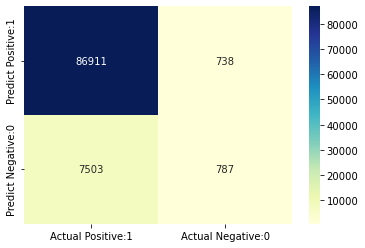

In [47]:
#metrics XGBoosting
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for data visualization
%matplotlib inline

cm = confusion_matrix(y_test, preds)

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

# print classification accuracy
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

# print precision score
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))
      
fone = (2*precision*recall)/(precision+recall)
print('f1 : {0:0.4f}'.format(fone))

plt.figure(figsize=(6,4))

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

Classification accuracy : 0.9151
Precision : 0.9945
Recall or Sensitivity : 0.9192
True Positive Rate : 0.9192
False Positive Rate : 0.4358
Specificity : 0.5642
f1 : 0.9554


<AxesSubplot:>

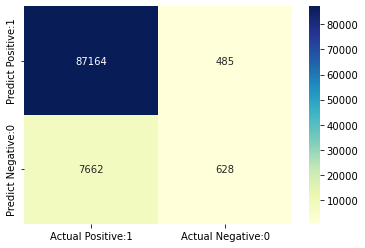

In [55]:
#metrics NN
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for data visualization
%matplotlib inline

y_pred=predictions = (model.predict(X_test) > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

# print classification accuracy
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

# print precision score
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))
      
fone = (2*precision*recall)/(precision+recall)
print('f1 : {0:0.4f}'.format(fone))

plt.figure(figsize=(6,4))

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
